<a href="https://colab.research.google.com/github/yashdeepkum/machine-learning/blob/main/air_quality_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [ ]:
!cp /state_weather_aqi_data_mf2.csv -r /content/drive/MyDrive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/state_weather_aqi_data_mf2.csv")

In [ ]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]

In [ ]:
x1 = df.iloc[:,:12].values
z1 = pd.DataFrame(x1)

y1 = df.iloc[:,12:13].values
z2 = pd.DataFrame(y1)

ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:,[1]]).toarray()) #city
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:,[2]]).toarray()) #station

feature_set = pd.concat([x_new1,x_new2,x_new3,pd.DataFrame(x1[:,5:12])],axis=1,sort=False)

x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=0)

### Multiple linear regression model

In [ ]:
mreg = LinearRegression()
mreg.fit(x_train,y_train)

mlr_y_predict = mreg.predict(x_test)

##### MLR Test data results:

In [ ]:
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)
rmsle_mlr = rmsle(y_test,mlr_y_predict)

print(f"Error Metrics for Test data (MLR):\n rmse_mlr: {rmse_mlr} \n mae_mlr: {mae_mlr}\n r2_mlr: {r2_mlr}\n rmsle_mlr: {rmsle_mlr}")

Error Metrics for Test data (MLR):
 rmse_mlr: 5.497472247507709 
 mae_mlr: 3.479973758969988
 r2_mlr: 0.9965383948360563
 rmsle_mlr: 0.05179588312058906


### polynomial regression model
degree = 2

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)

pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

##### PR Test data results:

In [ ]:
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmsle_pr = rmsle(y_test,pr_y_predict)

print(f"Error Metrics for Test data (PR):\n rmse_pr: {rmse_pr} \n mae_pr: {mae_pr}\n r2_pr: {r2_pr}\n rmsle_pr: {rmsle_pr}")

Error Metrics for Test data (PR):
 rmse_pr: 211.87588034477108 
 mae_pr: 81.58551569192791
 r2_pr: -4.141791700302279
 rmsle_pr: 0.4638972580109061


### Decision Tree regression model

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

dt_y_predict = dec_tree.predict(x_test)

##### Decision Tree Test data results:

In [ ]:
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)
rmsle_dt = rmsle(y_test,dt_y_predict)

print(f"Error Metrics for Test data (DT):\n rmse_dt: {rmse_dt} \n mae_dt: {mae_dt}\n r2_dt: {r2_dt}\n rmsle_dt: {rmsle_dt}")

Error Metrics for Test data (DT):
 rmse_dt: 6.237027353161251 
 mae_dt: 2.354591836734694
 r2_dt: 0.9955443944501944
 rmsle_dt: 0.05631439838860221


### RFR regression model

In [ ]:
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)

rt_y_predict = rt_reg.predict(x_test)

<ipython-input-14-b699815d98ee>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt_reg.fit(x_train,y_train)


##### RFR Test data results:

In [ ]:
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)
rmsle_rt = rmsle(y_test,rt_y_predict)

print(f"Error Metrics for Test data:\n rmse_rt: {rmse_rt} \n mae_rt: {mae_rt}\n r2_rt: {r2_rt}\n rmsle_rt: {rmsle_rt}")

Error Metrics for Test data:
 rmse_rt: 3.857722119201899 
 mae_rt: 1.7016479591836735
 r2_rt: 0.9982954359639727
 rmsle_rt: 0.04229629617333233


### SVR regression model

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(x_train)
y_train_svr = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_svr,y_train_svr)

svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)).reshape(1,-1))

##### SVR Test data results:

In [ ]:
rmse_svr = sqrt(metrics.mean_squared_error(y_test, svr_y_predict.T))
mae_svr = metrics.mean_absolute_error(y_test, svr_y_predict.T)
r2_svr = metrics.r2_score(y_test,svr_y_predict.T)
rmsle_svr = rmsle(y_test,svr_y_predict.T)

print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n mae_svr: {mae_svr}\n r2_svr: {r2_svr}\n rmsle_svr: {rmsle_svr}")

Error Metrics for Test data:
 rmse_svr: 27.002594524223504 
 mae_svr: 19.072271430610268
 r2_svr: 0.9164853954796425
 rmsle_svr: 0.16860094772273845


In [ ]:
print("evaluating on testing data:")
print("----------------------------------------")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmsle_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmsle_rt))
print("SVR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_svr,rmse_svr,mae_svr,rmsle_svr))

evaluating on testing data:
----------------------------------------
models	R^2	RMSE	MAE	RMSLE
MLR	0.9965	5.4975	3.4800	0.0518
PR	-4.14	211.88	81.586	0.4639
DTR	0.9955	6.2370	2.3546	0.0563
RFR	0.9983	3.8577	1.7016	0.0423
SVR	0.9165	27.0026	19.0723	0.1686


## Plotting Actual vs Predicted AQI

In [ ]:
import matplotlib.pyplot as plt

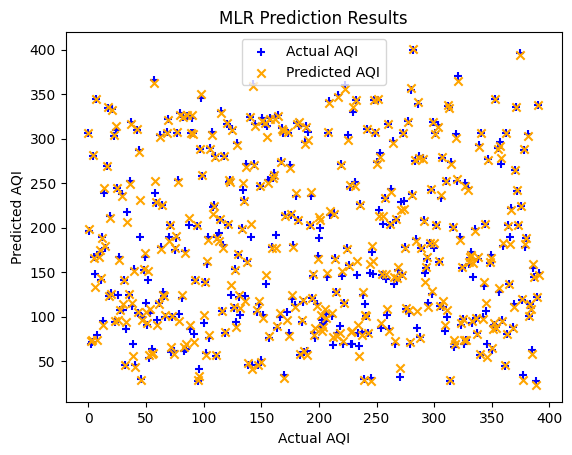

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(mlr_y_predict)), mlr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('MLR Prediction Results')
plt.legend()
plt.show()

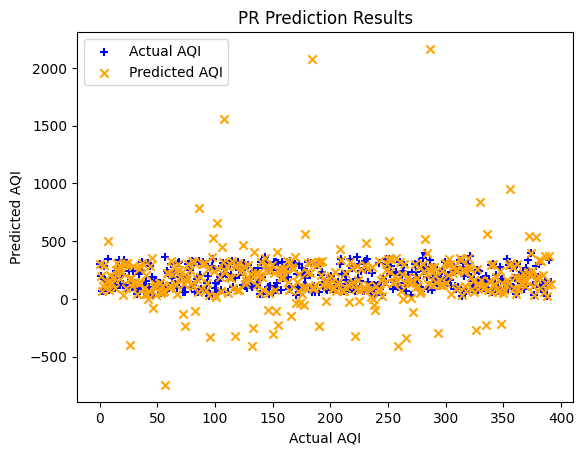

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(pr_y_predict)), pr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('PR Prediction Results')
plt.legend()
plt.show()

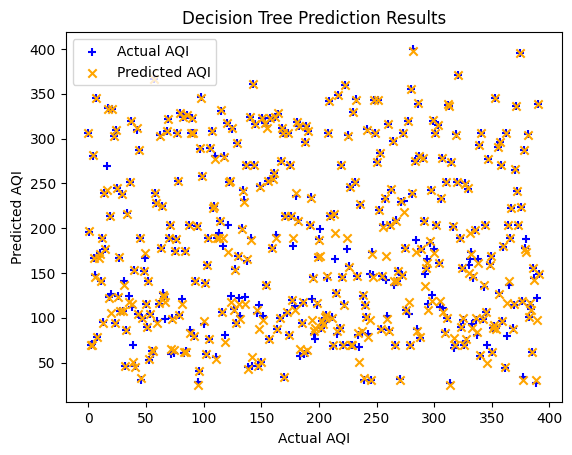

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(dt_y_predict)), dt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results')
plt.legend()
plt.show()

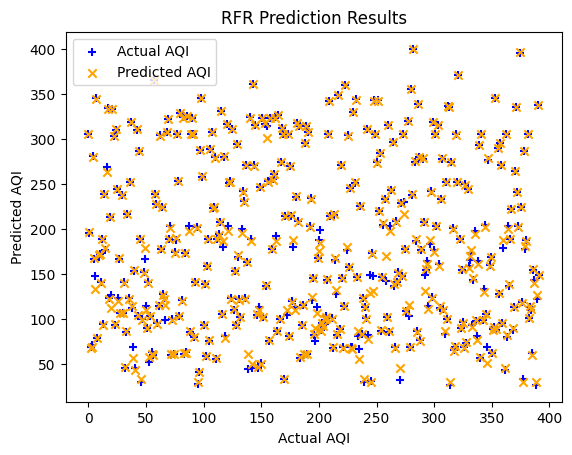

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(rt_y_predict)), rt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('RFR Prediction Results')
plt.legend()
plt.show()

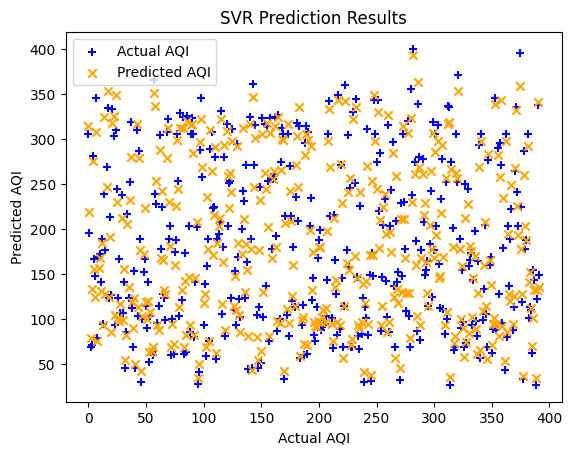

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(svr_y_predict.T)), svr_y_predict.T, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Prediction Results')
plt.legend()
plt.show()